In [145]:
# load data
import pandas as pd
# load data
df = pd.read_csv("housing.csv",
                 delim_whitespace=True,
                 header=None,
                 names=['CRIM',
                        'ZN',
                        'INDUS',
                        'CHAS',
                        'NOX',
                        'RM',
                        'AGE',
                        'DIS',
                        'RAD',
                        'TAX',
                        'PTRATIO',
                        'B',
                        'LSTAT',
                        'MEDV'])

In [146]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


Where MEDV is the target variable

In [147]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [148]:
# lets fill missing values with median
Age_median = df["AGE"].median()
LSTAT_median = df["LSTAT"].median()
CRIM_median = df["CRIM"].median()
ZN_median = df["ZN"].median()
INDUS_median = df["INDUS"].median()
CHAS_median = df["CHAS"].median()

In [149]:
df["AGE"] = df["AGE"].fillna(Age_median)
df["LSTAT"] = df["LSTAT"].fillna(LSTAT_median)
df["CRIM"] = df["AGE"].fillna(CRIM_median)
df["ZN"] = df["ZN"].fillna(ZN_median)
df["INDUS"] = df["INDUS"].fillna(INDUS_median)
df["CHAS"] = df["CHAS"].fillna(CHAS_median)

In [150]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


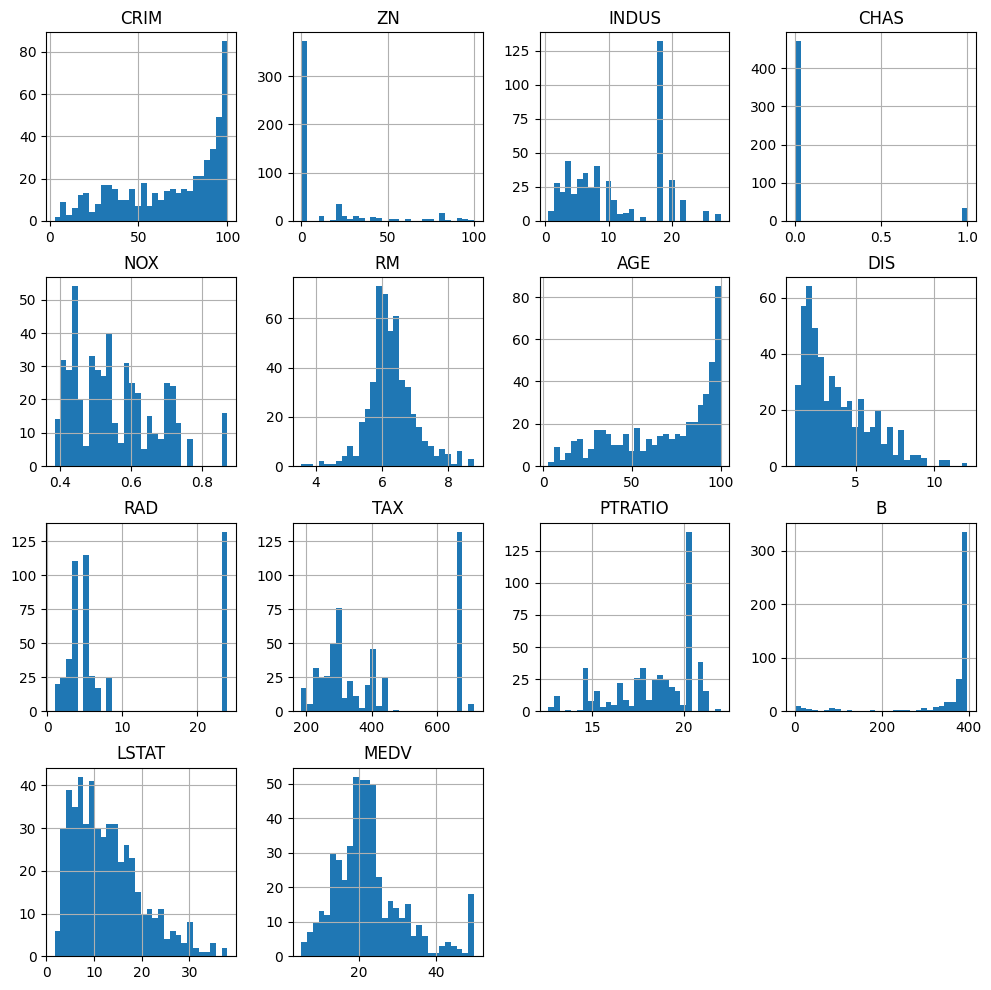

In [151]:
_ = df.hist(bins=30, figsize=(12,12))

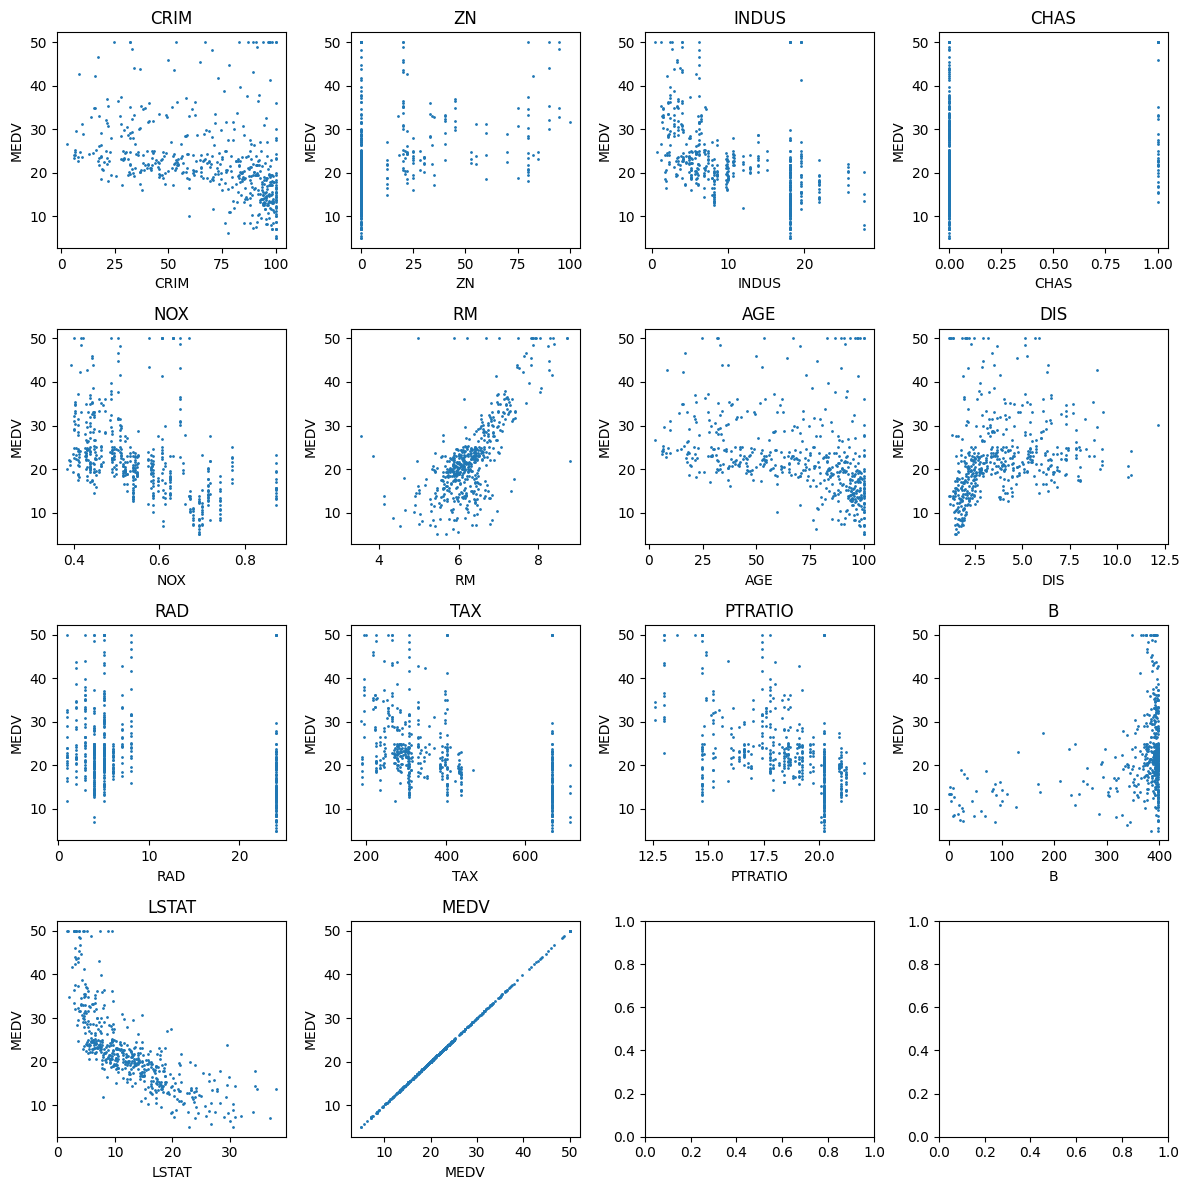

In [152]:
# Let's plot against the target label
import matplotlib.pyplot as plt
fig, axs = plt.subplots(4,4, figsize=(12,12),tight_layout=True)

for i, value in enumerate(df.columns):
    axs.flat[i].scatter(df[value], df["MEDV"], s=1)
    axs.flat[i].set_title(value)
    axs.flat[i].set_ylabel("MEDV")
    axs.flat[i].set_xlabel(value)


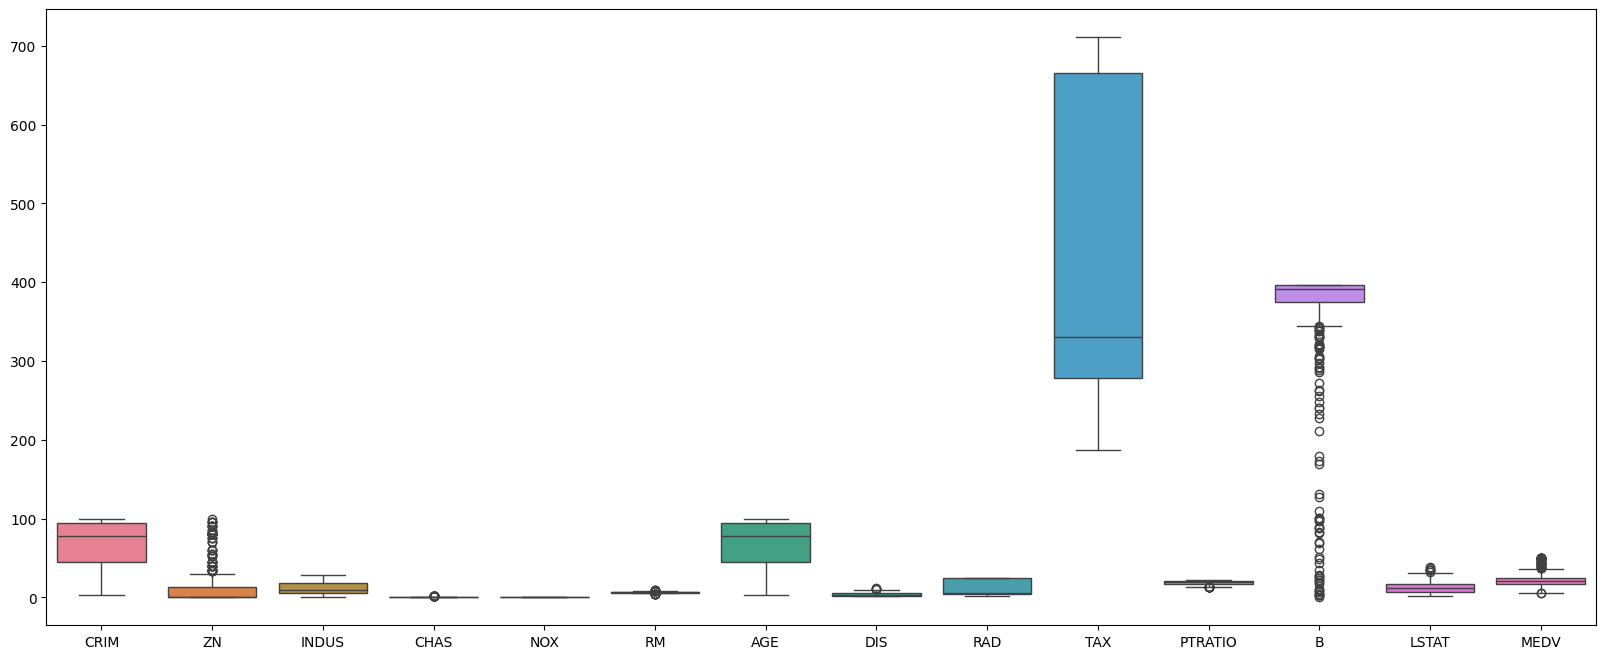

In [153]:
# looking for outliers using box plot
import seaborn as sns
plt.figure(figsize = (20, 8))
sns.boxplot(data = df, width = 0.8)
plt.show()

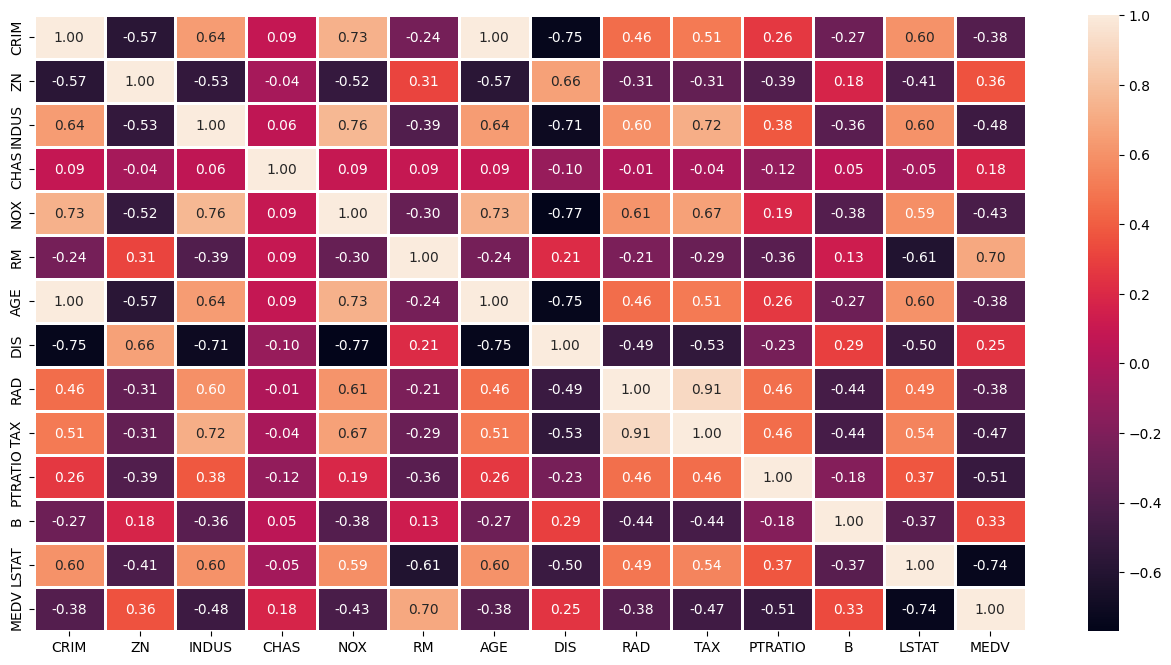

In [154]:
# Heatmap

fig, ax = plt.subplots(figsize = (16, 8))
sns.heatmap(df.corr(), annot = True, fmt = '1.2f', annot_kws = {'size' : 10}, linewidth = 1)
plt.show()

In [155]:
# From the heatmap we can conclude that we can drop the one of TAX or RAD because they are 0.91 correlated
df.drop("TAX", axis=1, inplace=True)

In [156]:
# For the outliers, lets apply a StandardScalar
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()


In [157]:
y = df["MEDV"]

In [158]:
X = df.drop("MEDV", axis=1)

In [159]:
from sklearn.model_selection import train_test_split

In [160]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [161]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [162]:
# let's create train and test dataset

# Let's implement linear regression

In [163]:
from sklearn.linear_model import LinearRegression

In [164]:
lr = LinearRegression()
lr_model = lr.fit(X_train_scaled, y_train)

In [165]:
# prediction of model
y_pred = lr.predict(X_test_scaled)

In [166]:
# test accuracy of model

lr.score(X_test_scaled, y_test)

0.7124515144214288

In [167]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_pred)

21.761240473350867

# Let's implement DT regression

In [168]:
from sklearn.tree import DecisionTreeRegressor
DT_reg = DecisionTreeRegressor()
DT_model = DT_reg.fit(X_train_scaled, y_train)

In [169]:
# prediction of model
y_pred = DT_model.predict(X_test_scaled)

In [170]:
# test accuracy of model
DT_model.score(X_test_scaled, y_test)

0.7836332701398664

In [171]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_pred) # worst error

16.37431137724551

# Let's implement SVR

In [172]:
from sklearn.svm import SVR
SVR_reg = SVR()
SVR_model = SVR_reg.fit(X_train_scaled, y_train)

In [173]:
# prediction of model
y_pred = SVR_model.predict(X_test_scaled)

In [174]:
# test accuracy of model
SVR_model.score(X_test_scaled, y_test)

0.6717215132069692

In [175]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_pred) # worst error

24.843626211270337

# Let's implement Lasso Regression

In [176]:
from sklearn.linear_model import Lasso, LassoCV

In [177]:
lasso_cv = LassoCV(alphas = None, cv = 10, max_iter = 100000)

In [178]:
lasso_model = lasso_cv.fit(X_train_scaled, y_train)

In [179]:
# best alpha parameter
alpha = lasso_cv.alpha_

In [180]:
lasso = Lasso(alpha = lasso_cv.alpha_)
lasso_model = lasso.fit(X_train_scaled, y_train)

In [181]:
lasso.score(X_test_scaled, y_test)

0.7093508752319553

In [182]:
# prediction of model
y_pred = lasso_model.predict(X_test_scaled)
mean_squared_error(y_test, y_pred)

21.99589222221147

# Let's Implement Ridge Regression

In [183]:
from sklearn.linear_model import Ridge, RidgeCV
import numpy as np
alphas = np.random.uniform(0, 10, 50)
ridge_cv = RidgeCV(alphas = alphas, cv = 10)
ridge_model = ridge_cv.fit(X_train_scaled, y_train)

In [184]:
ridge_model.score(X_test_scaled, y_test)

0.7109571180346799

In [185]:
# prediction of model
y_pred = ridge_model.predict(X_test_scaled)
mean_squared_error(y_test, y_pred)

21.874334162817245

# Let's implement ElasticNet

In [186]:
from sklearn.linear_model import ElasticNet, ElasticNetCV
elastic_net_cv = ElasticNetCV(alphas = None, cv = 10, max_iter = 100000)
elastic_model = elastic_net_cv.fit(X_train_scaled, y_train)

In [187]:
# l1 ratio
elastic_net_cv.l1_ratio

0.5

In [188]:
elastic_net = ElasticNet(alpha = elastic_net_cv.alpha_, l1_ratio = elastic_net_cv.l1_ratio)
elastic_model = elastic_net.fit(X_train_scaled, y_train)

In [189]:
elastic_model.score(X_test_scaled, y_test)

0.707726998836733

In [190]:
# prediction of model
y_pred = elastic_model.predict(X_test_scaled)
mean_squared_error(y_test, y_pred)

22.118784765583175